In [108]:
import pandas as pd
import numpy as np

In [109]:
from pandas import DataFrame 

In [171]:
df_train = pd.read_csv('/home/ahmed/Downloads/random-linear-regression/train.csv')
df_test = pd.read_csv('/home/ahmed/Downloads/random-linear-regression/test.csv')

In [172]:
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [173]:
df_train.shape

(700, 2)

In [174]:
df_train[df_train['y'].isnull()] # show null values

,x,y
213,3530.157369,NaN


In [175]:
df_train = df_train[~df_train['y'].isnull()]

In [176]:
df_train[df_train['y'].isnull()]

,x,y


In [177]:
x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

In [178]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [180]:
clf = LinearRegression(normalize=True)

In [181]:
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [182]:
y_pred = clf.predict(x_test)

In [183]:
print(r2_score(y_test,y_pred))

0.9888014444327563


In [184]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  scorer

In [185]:
print(mean_squared_error(y_test,y_pred))

9.43292219203931


### linear regression from scratch

In [187]:
print(np.isnan(np.min(x_train)))

False


In [232]:
n = 700
alpha = 0.01

a_0 = np.zeros((1,))
a_1 = np.zeros((1,))

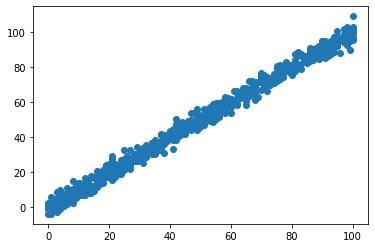

In [233]:
plt.scatter(x_train, y_train)
plt.show()

In [249]:
w = np.zeros((699, ))
b = np.zeros((699, ))


In [250]:
for i in range(epochs):
    
    y_pred = x_train.reshape(-1,) * w + b
    
    error = np.square(y_train - y_pred)
    loss = np.mean(np.sum(error))
    dw = 2.0 * (error * x_train)
    db = 2.0 * (error)
    
    w = w + alpha * dw
    b = b + alpha * db
    print(loss)
    if (i+1)%10 == 0:
        print(loss)
        break
    
    

2334747.2534988923
9.814767487653518e+16
3.720628262544363e+33
3.028977383162091e+67
1.1576933177386153e+136
2.171308094432594e+274
inf
inf
inf
inf
inf


/home/ahmed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/home/ahmed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys
/home/ahmed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  


In [234]:
epochs = 0
while(epochs < 1000):
    y = a_0 + x_train * a_1
    error = (y - y_train)
    mean_sq_er = np.mean(error**2)
    
    dw = 2 * np.mean(error * x_train)
    db = 2 * np.mean(error)
    
    print('dw', dw)
    
    print('db', db)
    a_0 = a_0 + alpha * db
    a_1 = a_1 + alpha * dw
    epochs += 1
    if(epochs%10 == 0):
        print(mean_sq_er)
        break

dw -4995.415811728769
db -99.87973834091558
dw -338649.02860622347
db -5098.722448359173
dw -22956008.58267107
db -343946.62079070474
dw -1556117739.1426334
db -23313402.378676638
dw -105484469156.29677
db -1580342650.6959627
dw -7150470013068.6
db -107126600196.24597
dw -484708524549285.75
db -7261785059435.601
dw -3.2856910572499364e+16
db -492254231583028.75
dw -2.2272696222396372e+18
db -3.3368411007618916e+16
dw -1.5097980557866376e+20
db -2.2619426746068193e+18
1.706921745011954e+36


In [235]:
import matplotlib.pyplot as plt 

In [ ]:
y_prediction = a_0 + a_1 * x_test
print('R2 Score:',r2_score(y_test,y_prediction))

ValueError: x and y can be no greater than 2-D, but have shapes (100,) and (100, 700, 1)

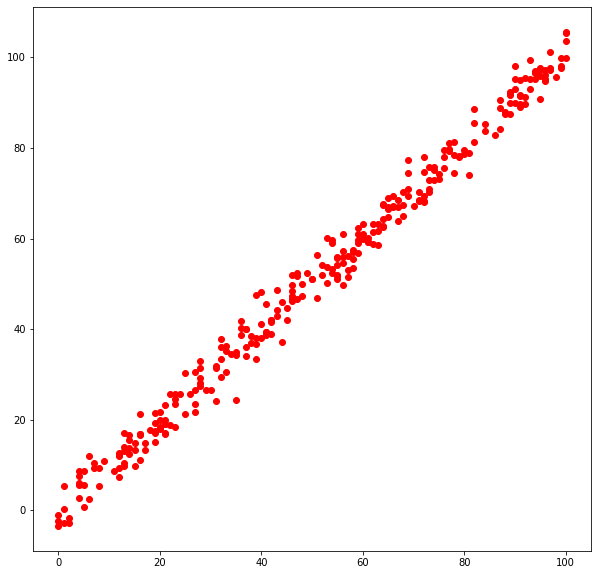

In [129]:
y_plot = []
for i in range(100):
    y_plot.append(a_0 + a_1 * i)
plt.figure(figsize=(10,10))
plt.scatter(x_test,y_test,color='red',label='GT')
plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')
plt.legend()
plt.show()